In [53]:
%matplotlib inline
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from math import pi
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import functools

In [10]:
def simulate(qc, shots=1000, backend=AerSimulator()):
    transpiled_circuit = transpile(qc, backend)
    return backend.run(transpiled_circuit, shots=shots).result().get_counts()

In [11]:
def fibonacci(n):
    qc = QuantumCircuit(n)
    qc.ry(pi/2, range(n))

    if(n > 1):
        for i in range(0, n-1):
            qc.cry(-pi/2, i, i+1)
    return qc

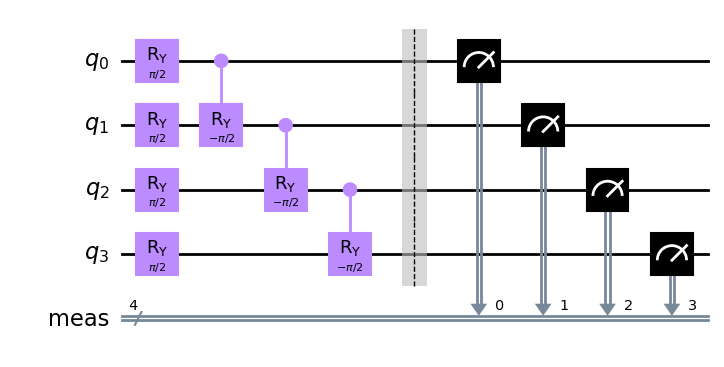

In [6]:
qc = fibonacci(4)
qc.measure_all()
qc.draw('mpl')

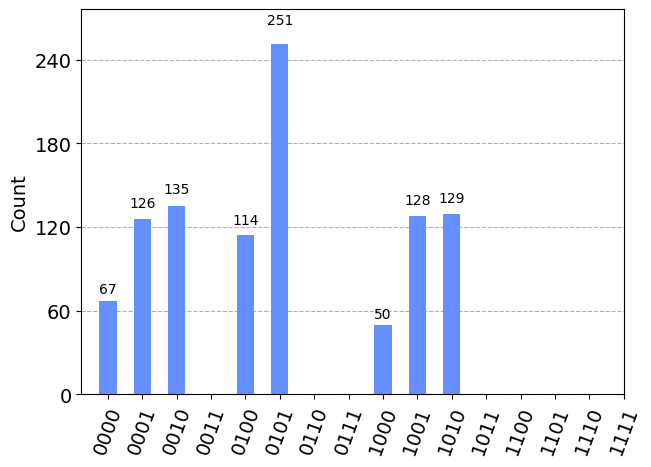

In [9]:
counts = simulate(qc)
results = {}

for bit_string in product('01', repeat=len(qc.qubits)):
    bit_string = ''.join(bit_string)
    results[bit_string] = 0 if counts.get(bit_string) is None else counts[bit_string]

plot_histogram(results)

# Fibonacci Sequence

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144

starting from 2

2, 3, 5, 8, 13, 21, 34, 55, 89, 144

F(4) = 8

In [12]:
def get_fibonacci_number(counts):
    return len(counts)

In [11]:
# F(4)
get_fibonacci_number(counts)

8

In [56]:
@functools.lru_cache(maxsize=None)
def recursive_fibonacci(n):
    if(n <= 1):
        return 1

    return recursive_fibonacci(n-1) + recursive_fibonacci(n-2) 

In [31]:
def evaluate_fibonacci_quantum(n, shots=1000):
    qc = fibonacci(n)
    qc.measure_all()
    counts = simulate(qc, shots=shots)
    return get_fibonacci_number(counts)

In [59]:
def comparation(shots=1000, range_=range(1,15)):
    y_values = {"classical":[], "quantum":[]}
    x_values = list(range_)
    for n in x_values:
        y_values["classical"].append(recursive_fibonacci(n+1))
        y_values["quantum"].append(evaluate_fibonacci_quantum(n, shots))
    return x_values, y_values

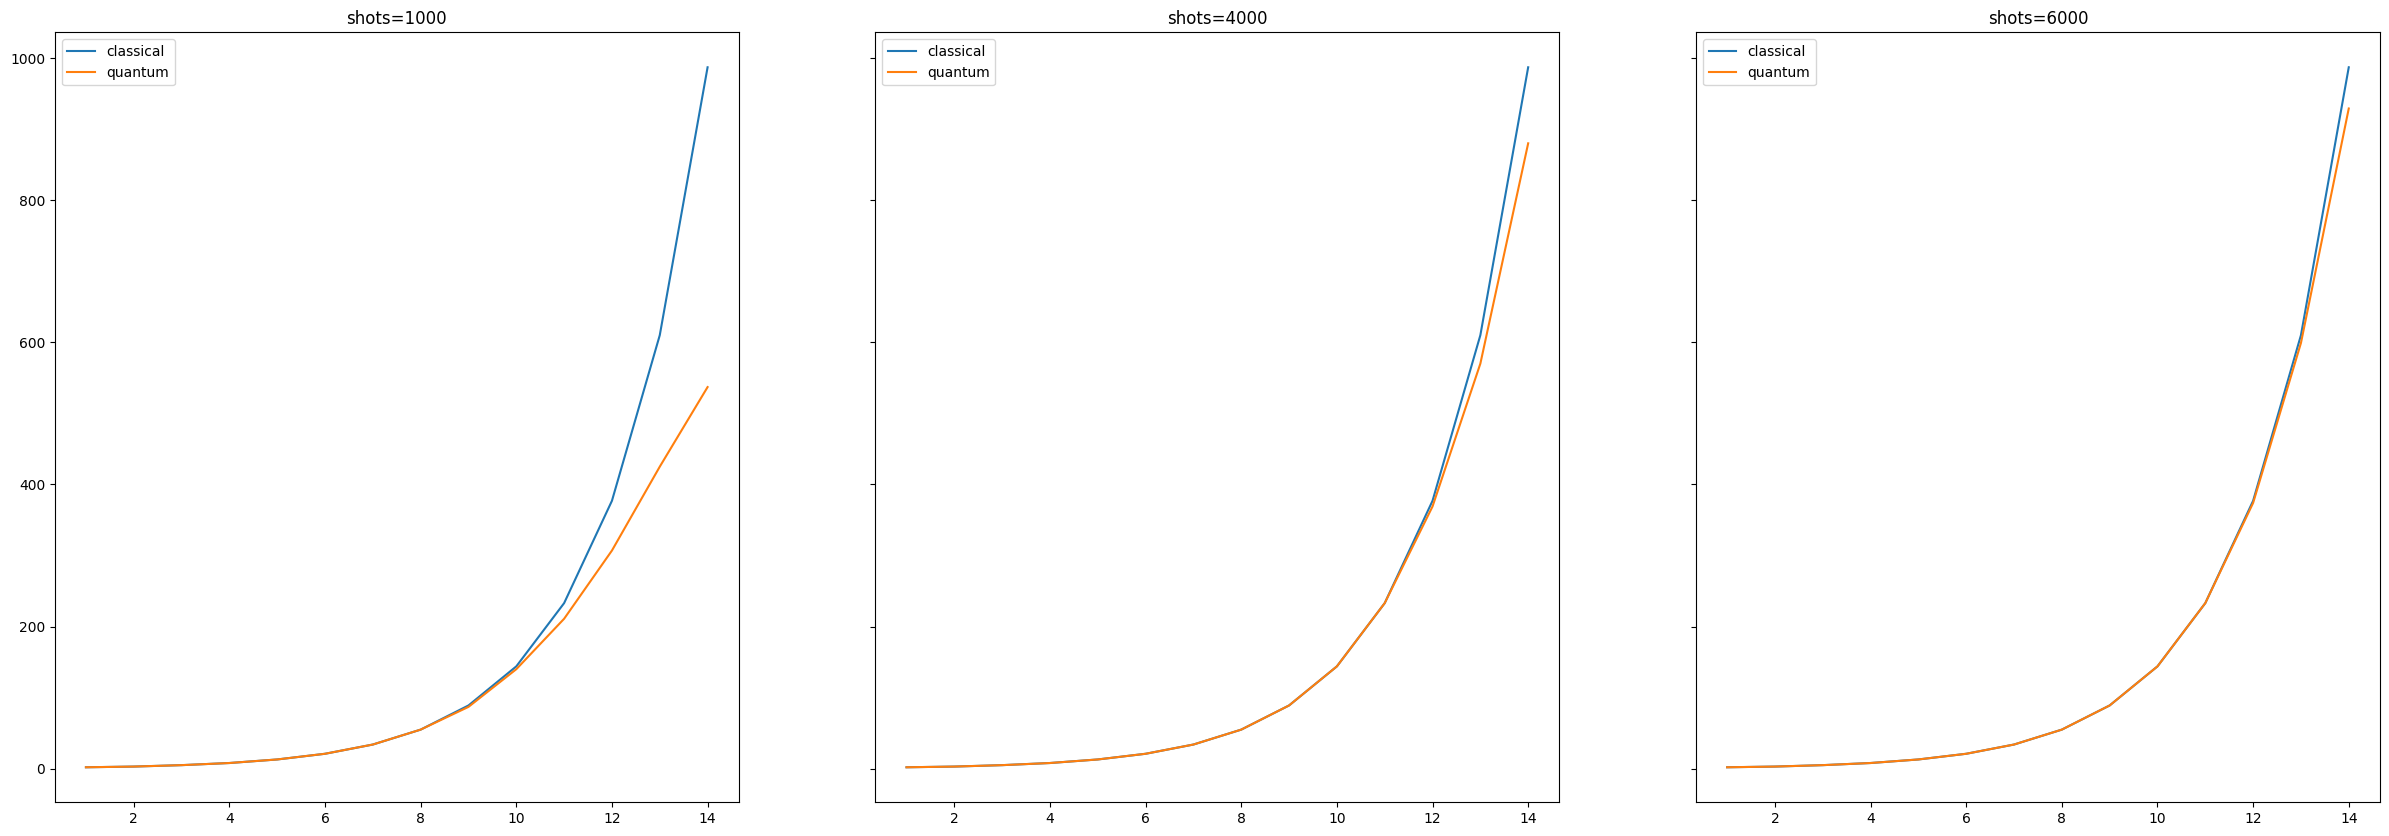

In [58]:
x_values, y_values_1000 = comparation(shots=1000)
_, y_values_4000 = comparation(shots=4000)
_, y_values_6000 = comparation(shots=6000)

x = pd.Series(x_values)

y_1000 = pd.DataFrame(y_values_1000)
y_4000 = pd.DataFrame(y_values_4000)
y_6000 = pd.DataFrame(y_values_6000)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(30, 10))

#plt.title("Comparation between quantum and classical Fibonacci algorithm")
ax1.plot(x, y_1000)
ax1.legend(labels=["classical", "quantum"])
ax1.set_title("shots=1000")

ax2.plot(x, y_4000)
ax2.legend(labels=["classical", "quantum"])
ax2.set_title("shots=4000")

ax3.plot(x, y_6000)
ax3.legend(labels=["classical", "quantum"])
ax3.set_title("shots=6000")

plt.show()